#Introduction


In the realm of modern HR management, understanding and addressing employee attrition has become pivotal for organizational success. This project focuses on employing data analytics and machine learning to predict and comprehend employee attrition patterns.

**Objectives:**
- Explore HR data to identify factors influencing attrition.
- Develop predictive models using machine learning algorithms.
- Evaluate model performance to aid in proactive retention strategies.
- Provide actionable insights for HR departments to mitigate attrition impact.

By leveraging analytics and machine learning, this project aims to empower HR professionals with actionable insights to curb attrition and foster a productive work environment.

# Importing libraries


In [ ]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore')

# Basic analysis

In [ ]:
# importing data
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df.sample(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,...,4,80,1,8,2,3,8,7,3,7
248,37,No,Travel_Rarely,1017,Research & Development,1,2,Medical,1,340,...,1,80,1,17,2,2,3,1,0,2
317,52,Yes,Travel_Rarely,723,Research & Development,8,4,Medical,1,433,...,1,80,0,11,3,2,8,2,7,7
735,48,No,Travel_Rarely,277,Research & Development,6,3,Life Sciences,1,1022,...,4,80,0,19,0,3,2,2,2,2
182,41,Yes,Travel_Rarely,1356,Sales,20,2,Marketing,1,248,...,4,80,0,4,5,2,4,3,0,2


In [ ]:
# shape
df.shape

(1470, 35)

In [ ]:
# null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# data type
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# percent of attrition
df.Attrition.value_counts()/len(df)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


**Dataset Overview:**

- 1470 observations, 35 features.
- Data types: 'object' and 'integer'.
- No missing data.
- 'Attrition' is the target variable.
- Imbalanced dataset: 16% left, 84% stayed.

In [ ]:
# transform target into numerical
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)

In [ ]:
# dropping EmployeeNumber feature
df = df.drop(['EmployeeNumber'], axis=1)

#EDA and Vizulization

In [ ]:
# making color palette
c2 = sns.color_palette('GnBu', n_colors=2)

In [ ]:
# function for countplot
def count_Plot(feature, data, xlabel, ylabel, axs, hu=None):
    ax = sns.countplot(x=feature, palette=c2, data=data, hue=hu, ax=axs)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center')
    axs.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
# function for pieplot
def pie_plot(feature, data, xlabel, axs):
    co = data[feature].value_counts(normalize=True)
    labels = ['Employee Stay','Employee Quit']
    axs.pie(co, labels = labels, colors=c2, autopct='%.0f%%')
    axs.set(xlabel=xlabel)

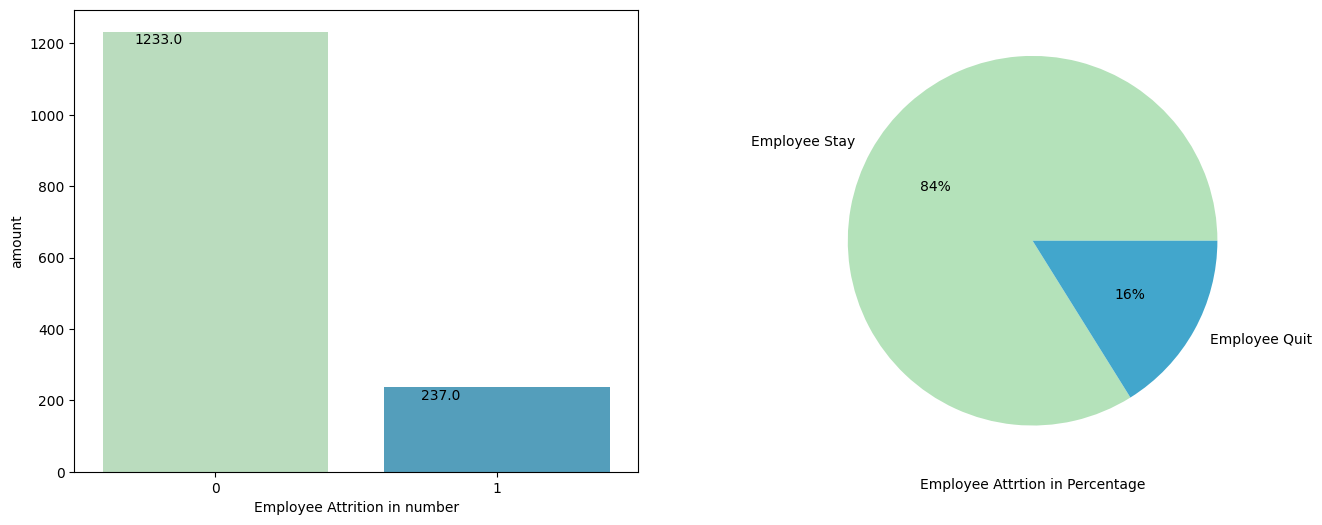

In [ ]:
# attrition rate
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
count_Plot("Attrition", df, "Employee Attrition in number", "amount", axes[0])
pie_plot('Attrition', df, "Employee Attrtion in Percentage", axes[1])
plt.show()

## uni-variate analysis

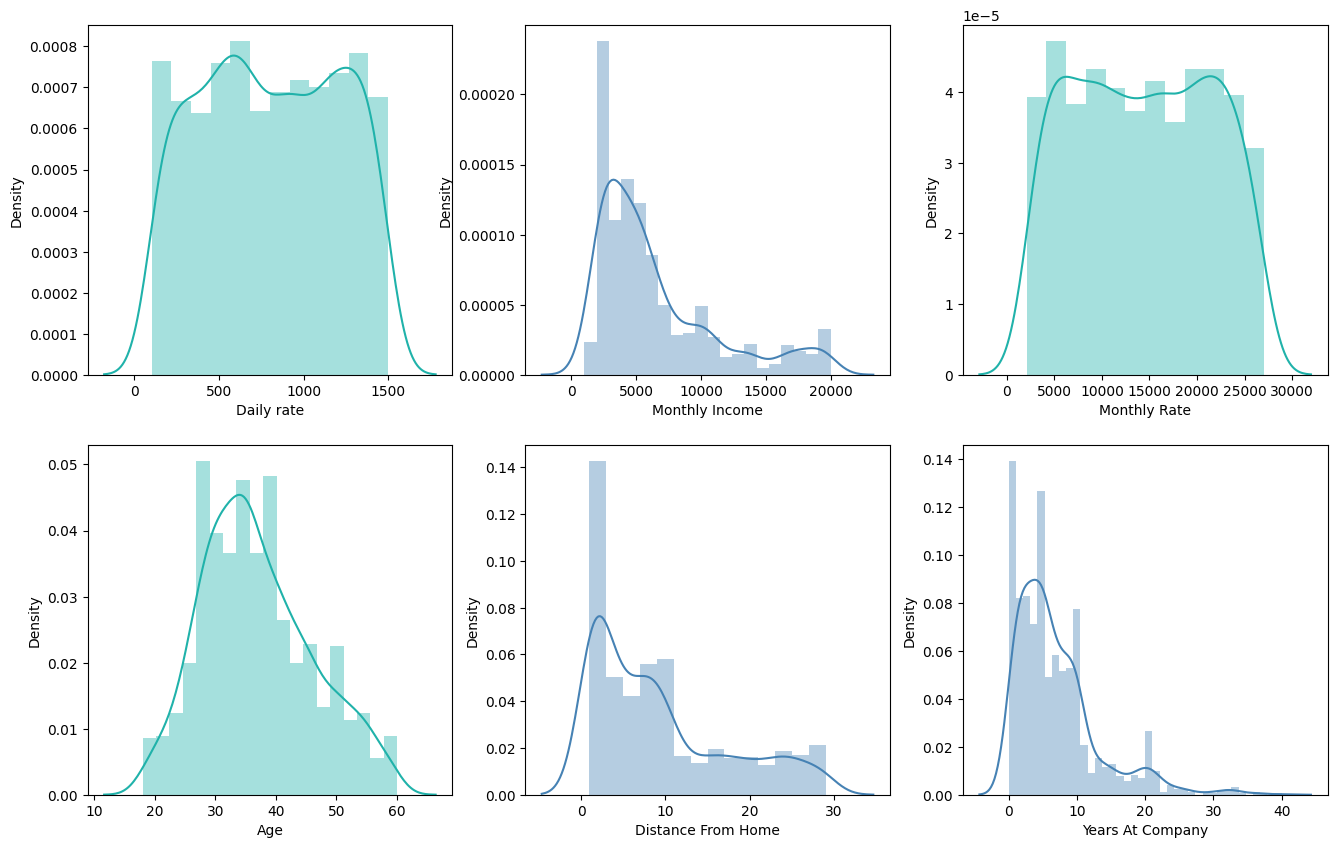

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.distplot(x=df['DailyRate'], kde=True, ax=axes[0,0], axlabel='Daily rate', color='lightseagreen')
sns.distplot(x=df['MonthlyIncome'], kde=True, ax=axes[0,1], axlabel='Monthly Income', color='steelblue')
sns.distplot(x=df['MonthlyRate'], kde=True,ax=axes[0,2], axlabel='Monthly Rate', color='lightseagreen')
sns.distplot(x=df['Age'], kde=True, ax=axes[1,0], axlabel='Age', color='lightseagreen')
sns.distplot(x=df['DistanceFromHome'], kde=True,ax=axes[1,1], axlabel='Distance From Home', color='steelblue')
sns.distplot(x=df['YearsAtCompany'], kde=True, ax=axes[1,2], axlabel='Years At Company', color='steelblue')
plt.show()

- **Plot reveals outliers in Monthl yIncome, Distance From Home, and Years At Company. Handling these outliers is planned in a later section**

##bi-variate analysis

In [ ]:
# selecting catagorical feature
cat_feat=[]
feat = df.drop(['Attrition'], axis=1)
for columns in feat:
    val =df[columns].value_counts().count()
    if (val>1) & (val<10) :
        cat_feat.append(columns)

<function matplotlib.pyplot.show(close=None, block=None)>

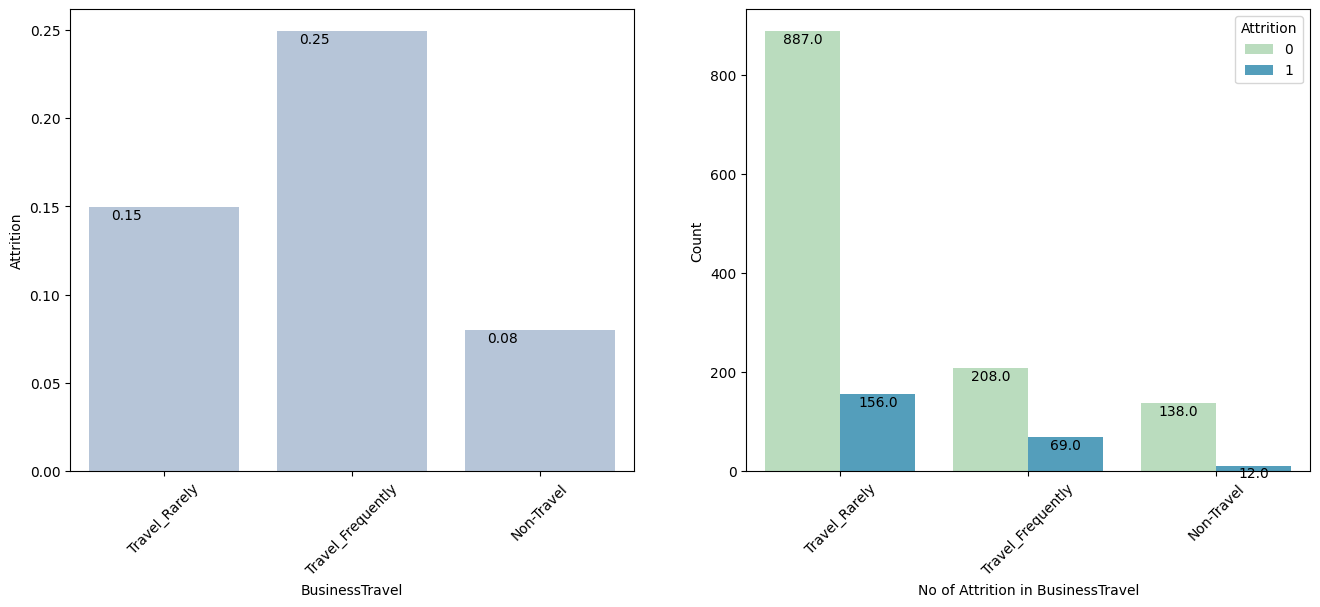

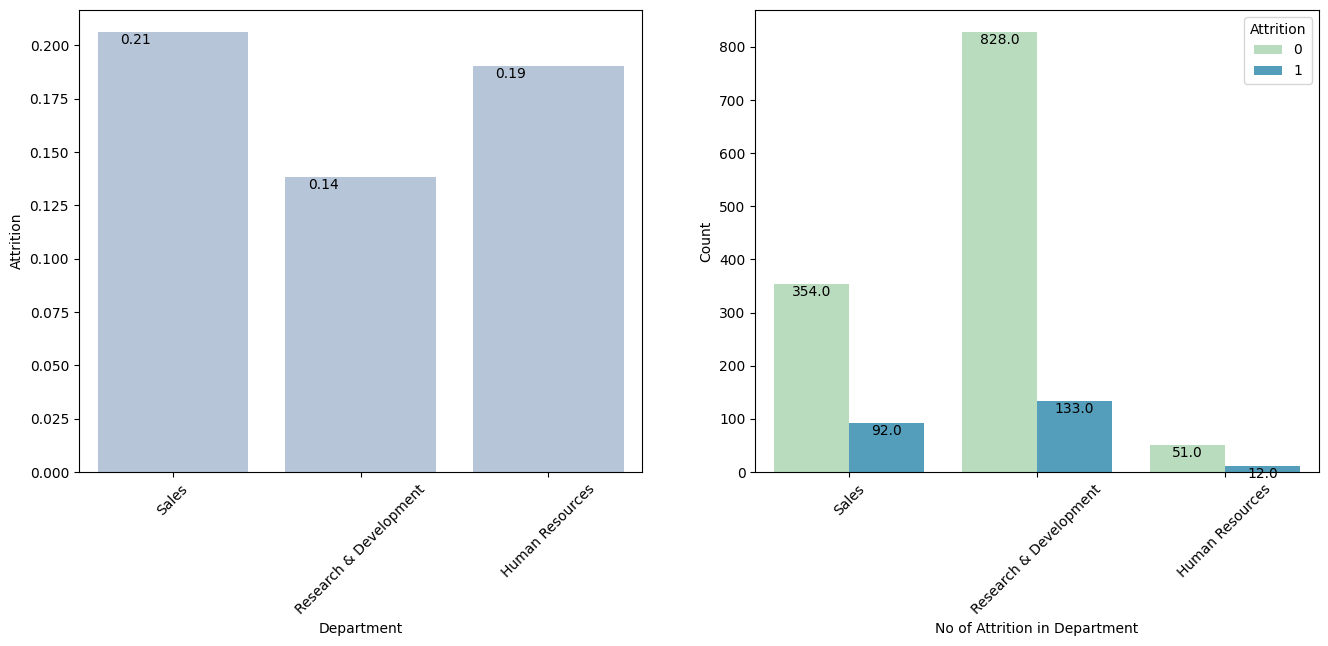

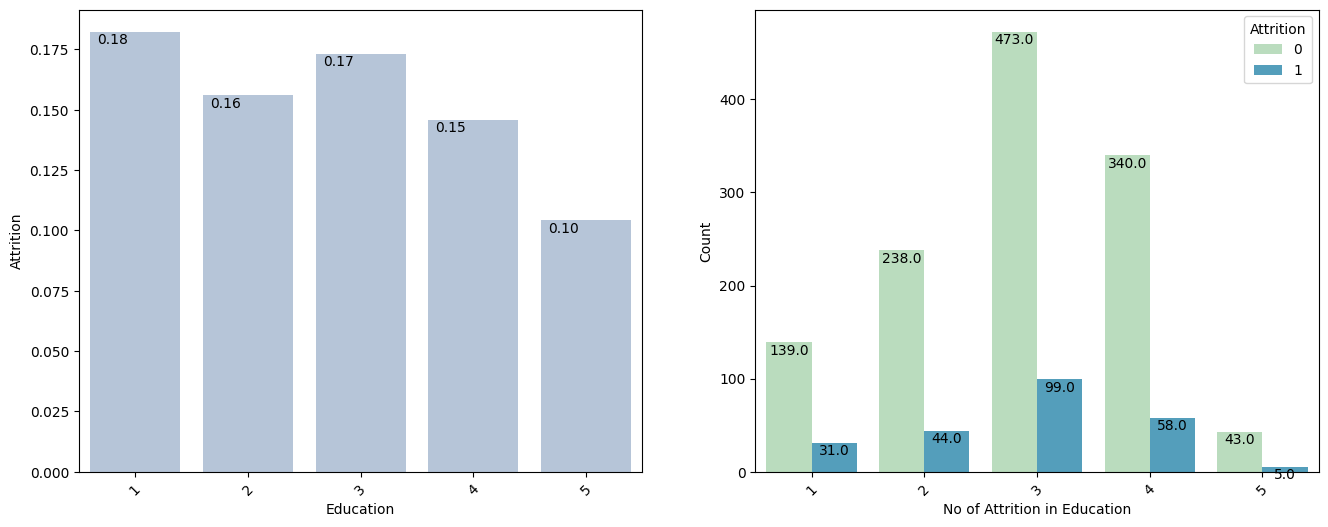

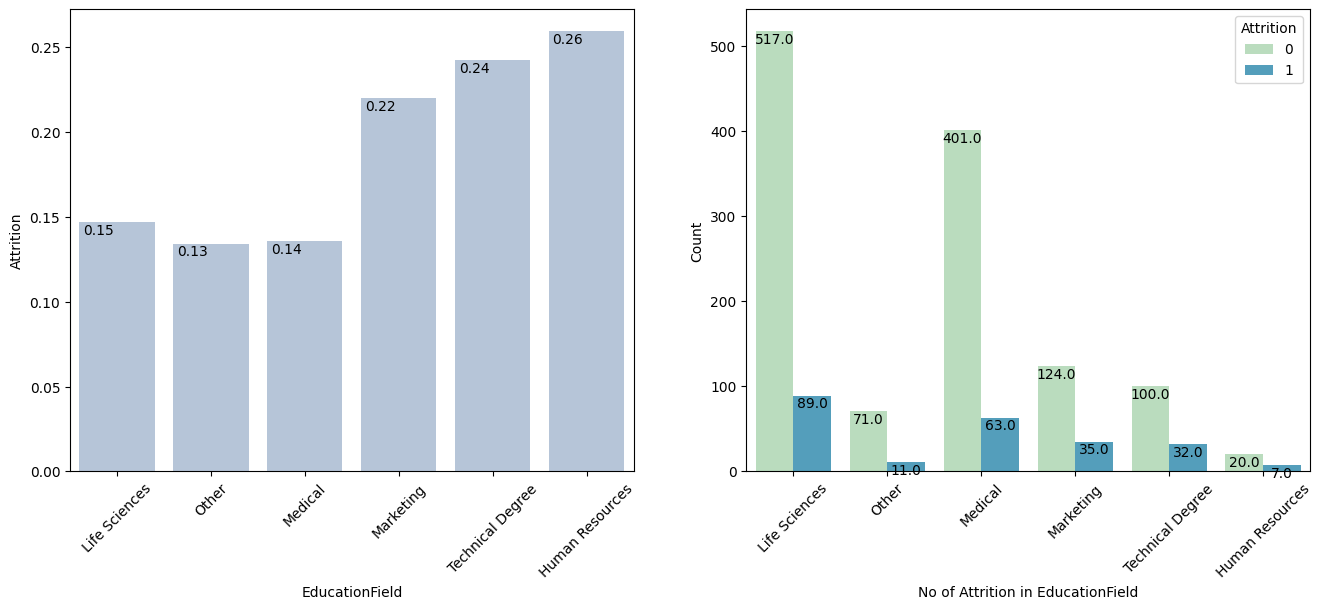

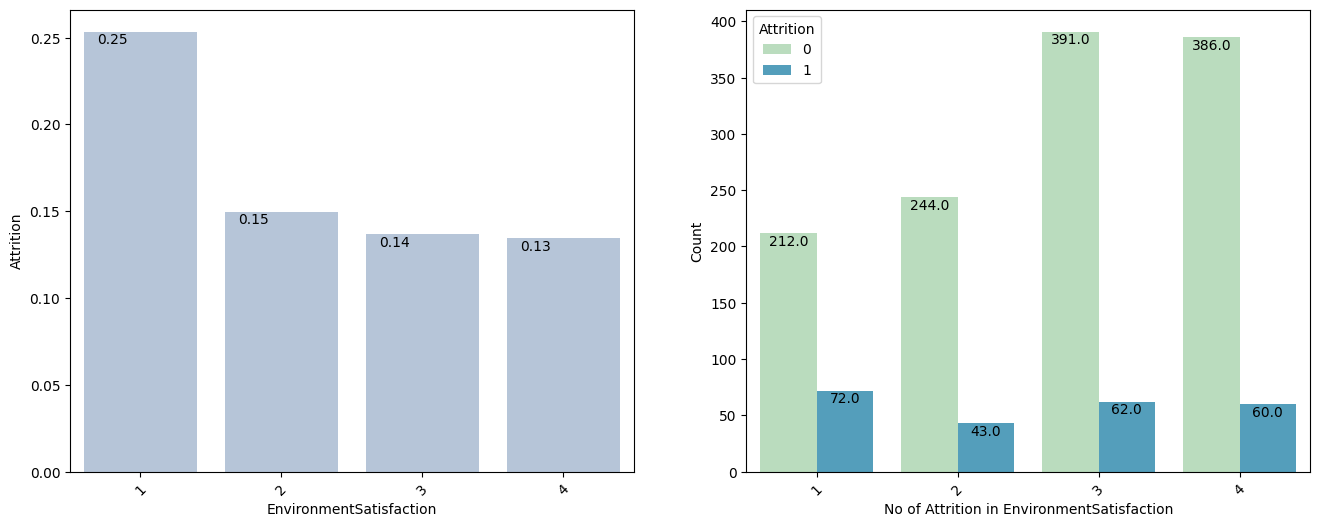

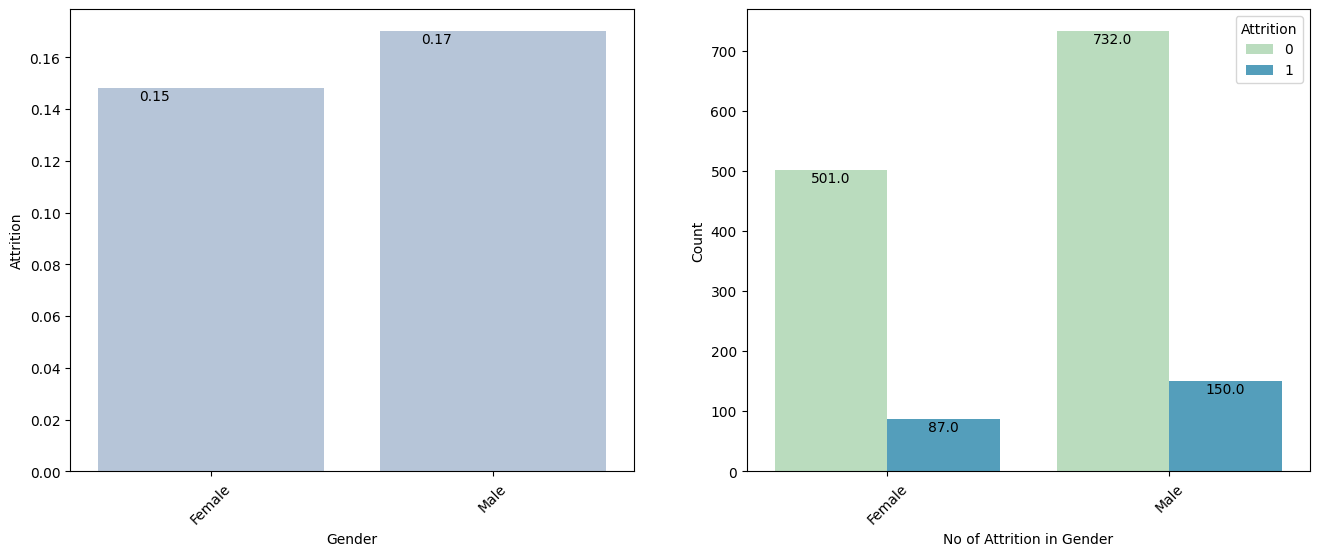

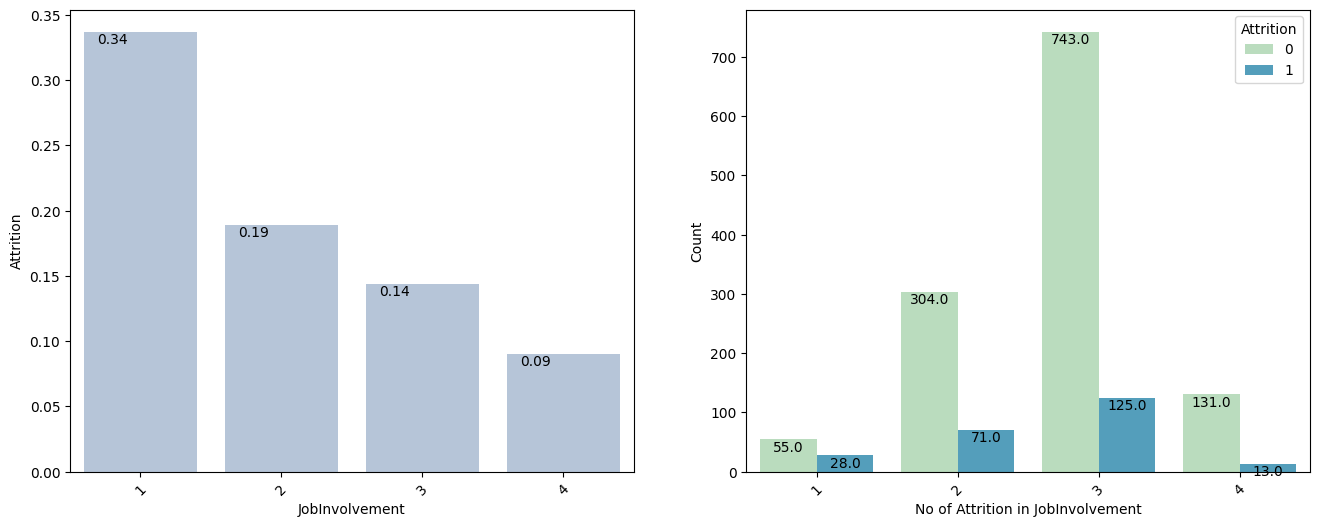

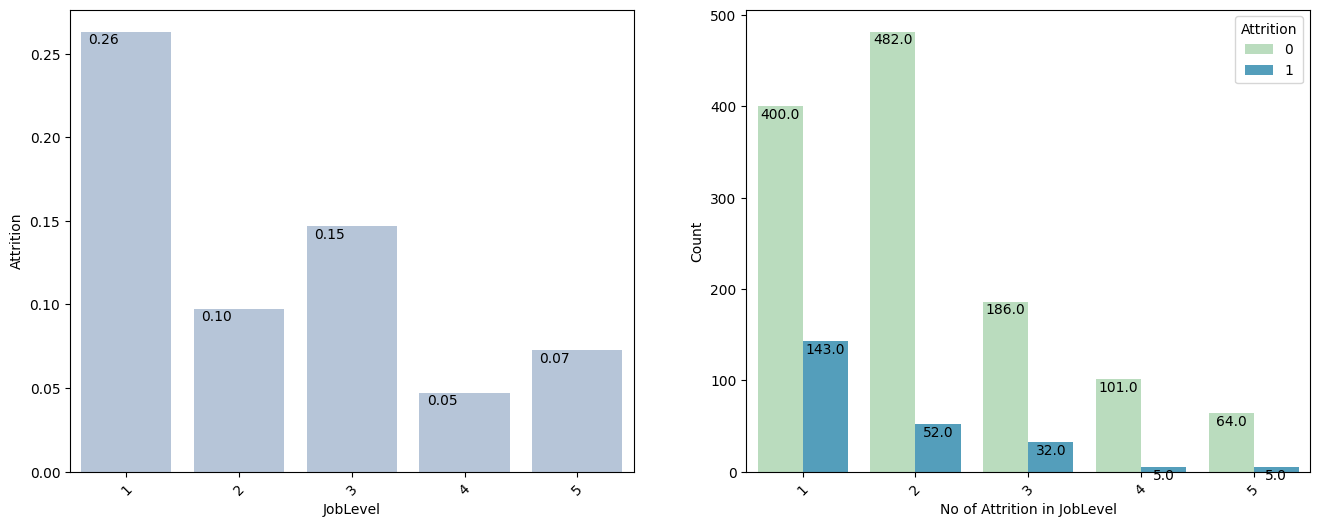

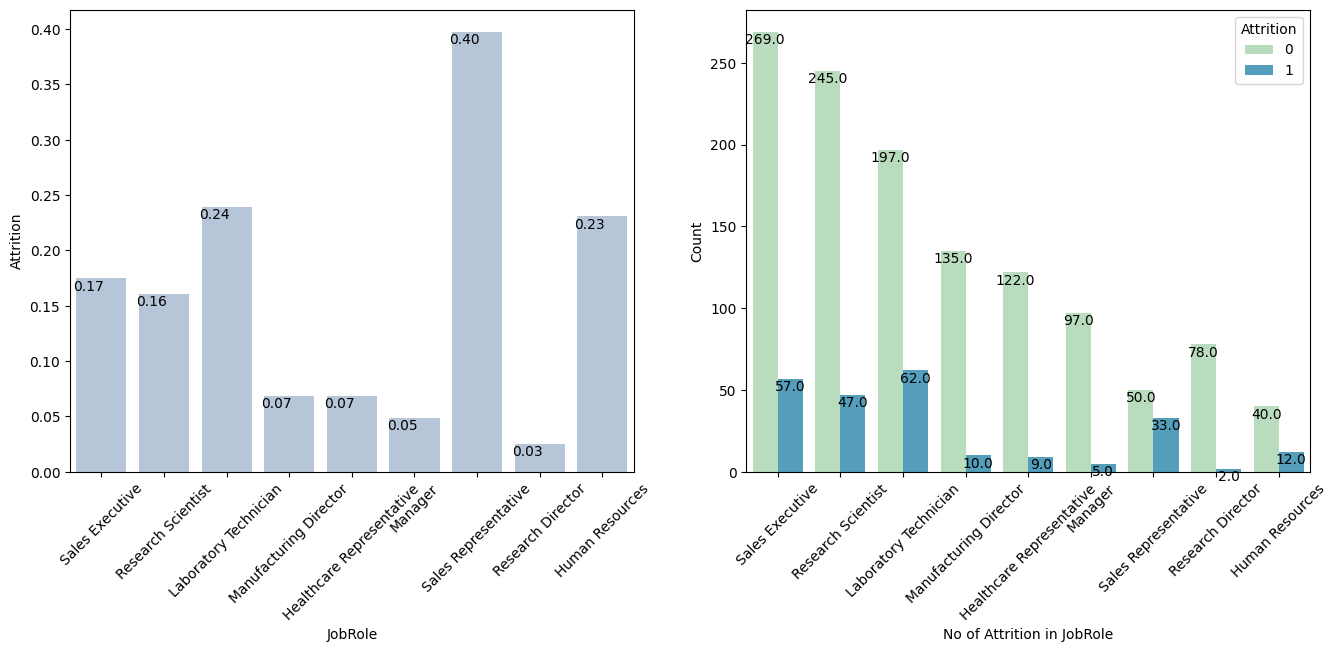

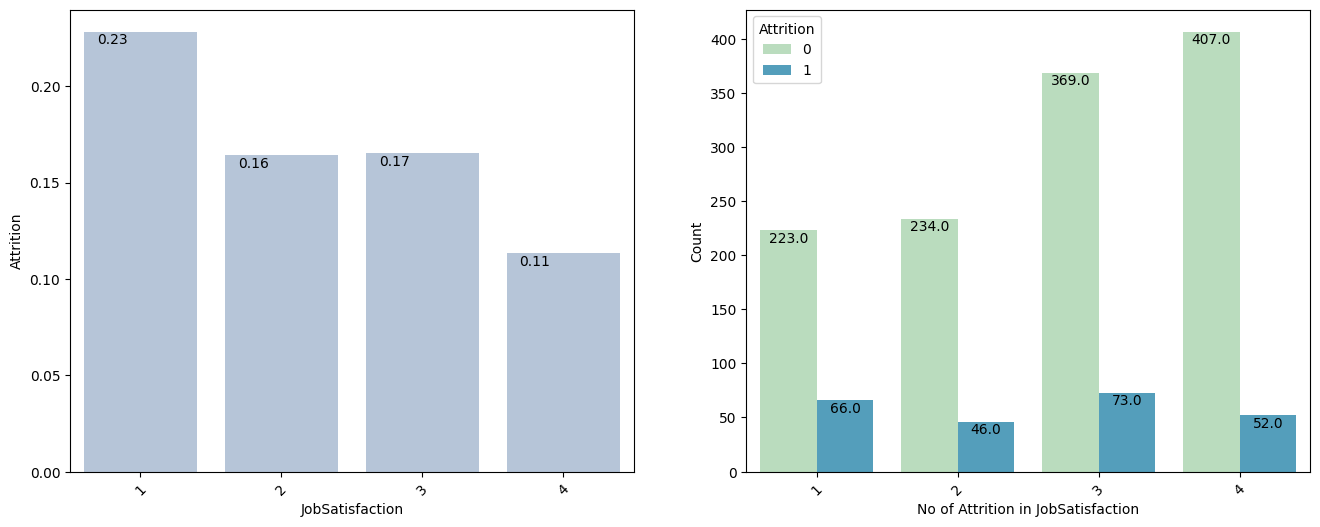

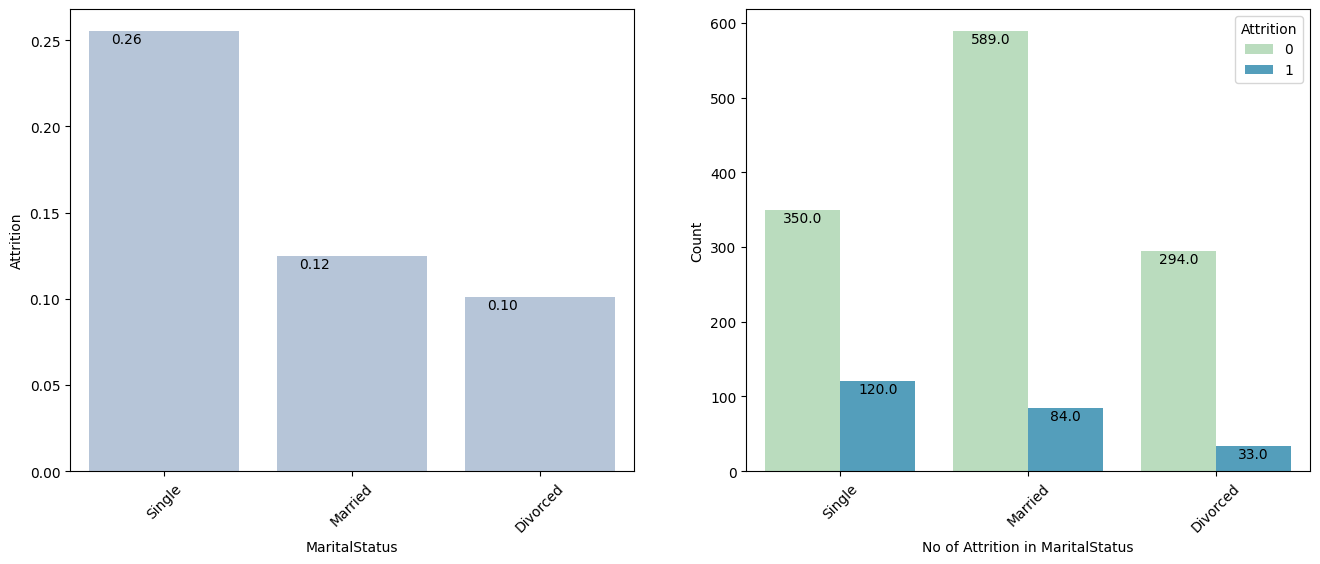

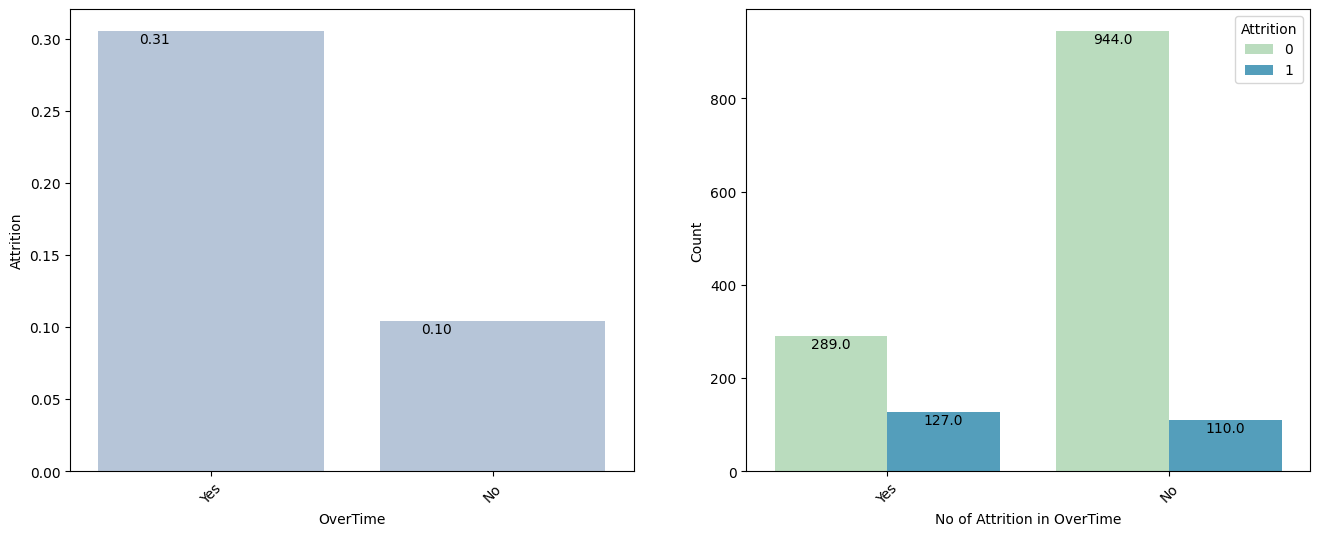

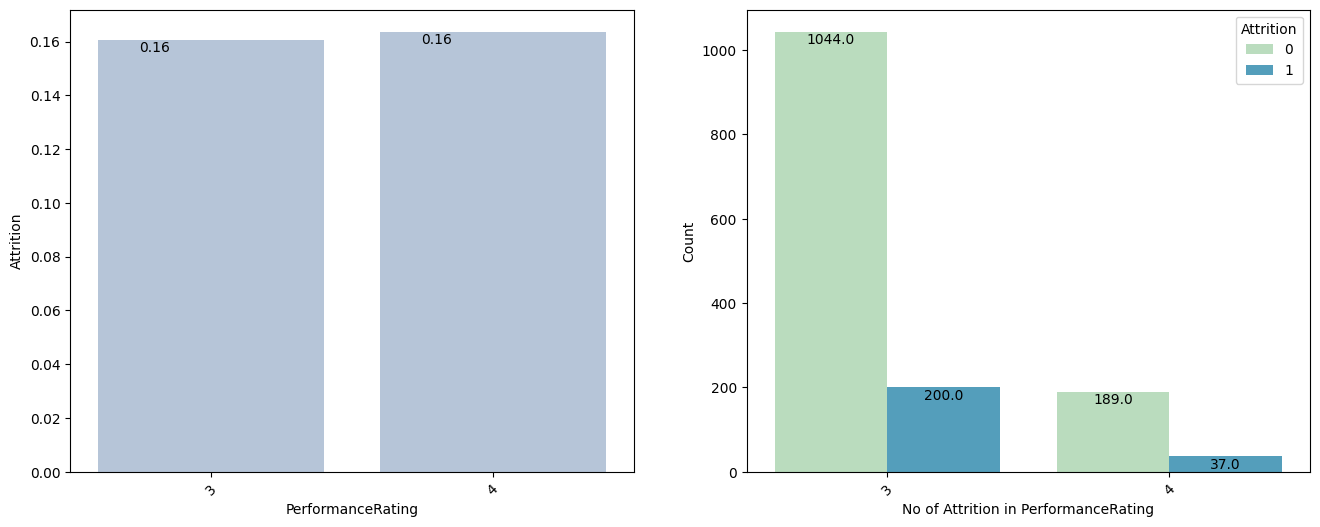

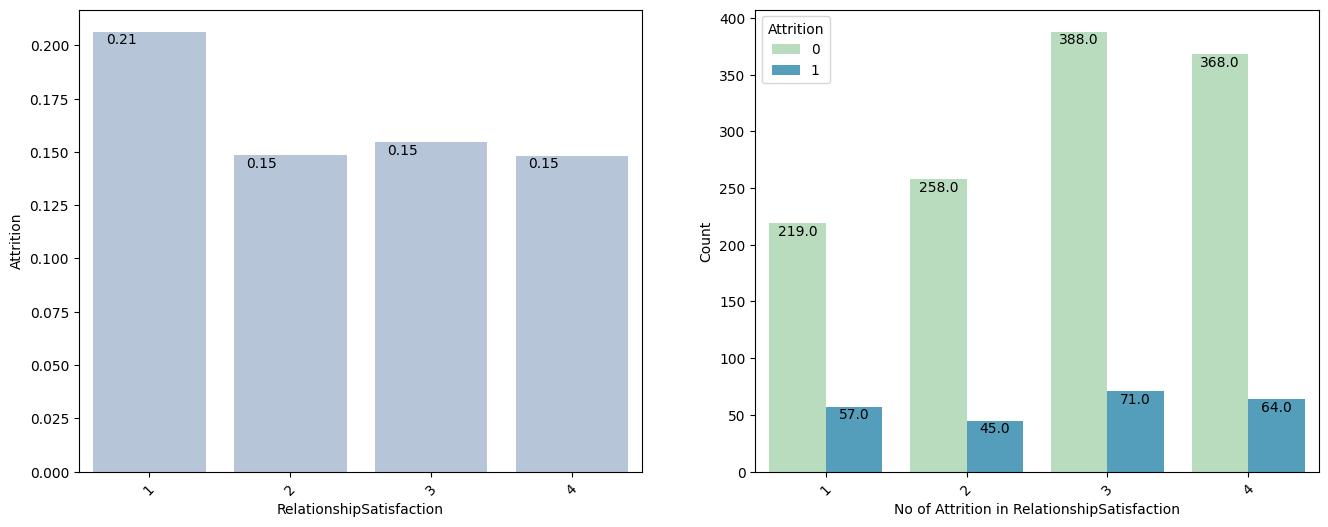

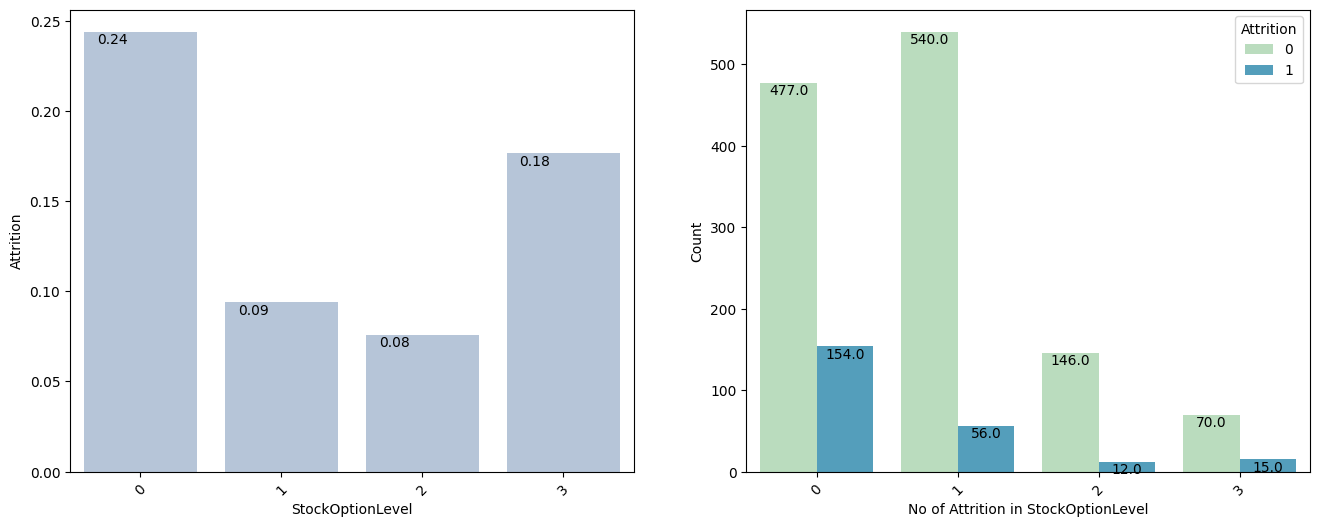

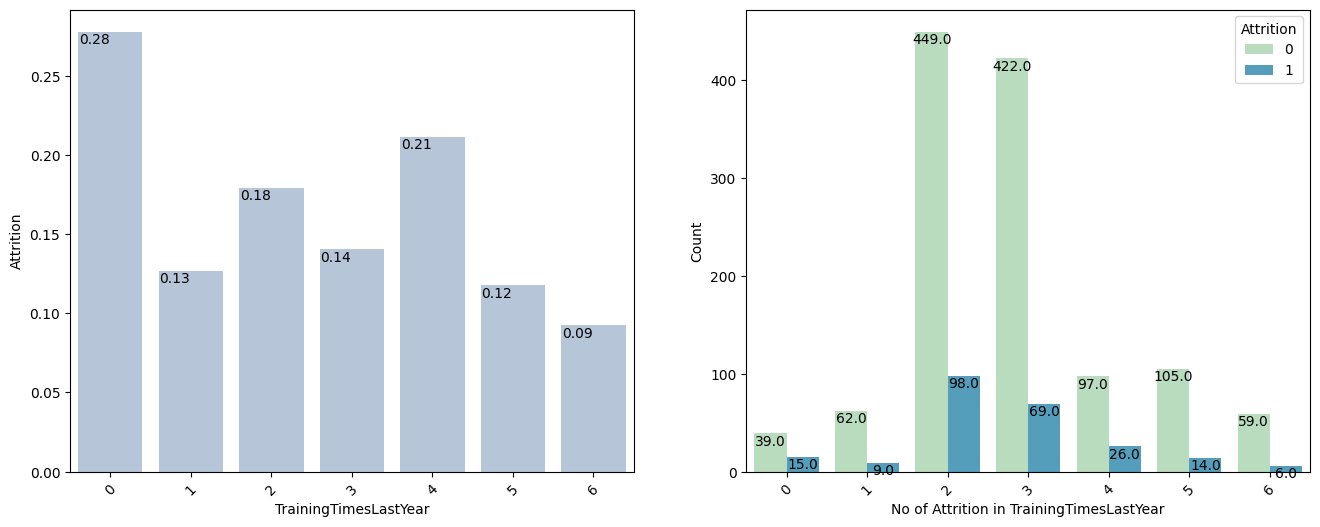

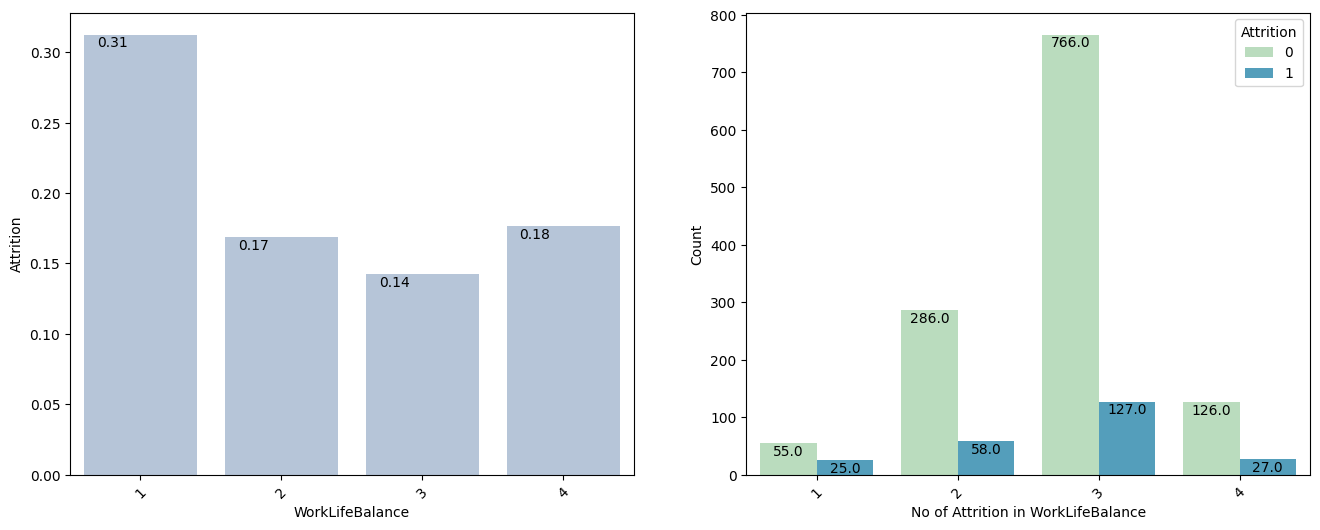

In [ ]:
# plotting charts
for column in cat_feat:
    fig, axes = plt.subplots(1,2, figsize=(16, 6))
    sns.barplot(x=column, y='Attrition', data=df, ax=axes[0], color='lightsteelblue', ci=None)
    axes[0].tick_params(axis='x', rotation=45)
    for p in axes[0].patches:
        axes[0].annotate(f'\n{p.get_height():.2f}', (p.get_x() + 0.2, p.get_height()), ha='center', va='center')

    xl="No of Attrition in "+column
    count_Plot(column, df, xl, "Count", axes[1],'Attrition')
    plt.xticks(rotation=45)

plt.show

**Key Findings:**

- Gender-based attrition rates are similar.
- 'PerformanceRatings' 3 and 4 show similar attrition rates.

These features will be dropped in subsequent analysis.

##Multi_variate feature analysis

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

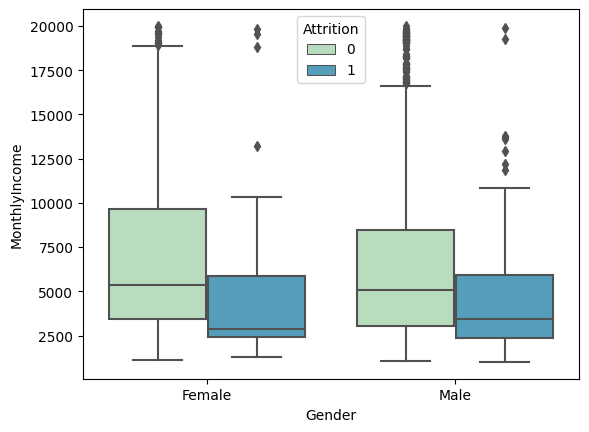

In [ ]:
sns.boxplot(x="Gender", y="MonthlyIncome", data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('Gender')['Attrition'].mean().to_frame()

,Attrition
Gender,
Female,0.147959
Male,0.170068


In [ ]:
df.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition               
Female 0            7019.429142
       1            4769.735632
Male   0            6704.964481
       1            4797.160000

In [ ]:
df.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition               
Female 0                 5329.0
       1                 2886.0
Male   0                 5075.0
       1                 3407.5

In [ ]:
df.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition           
Female 0          38.155689
       1          32.574713
Male   0          37.154372
       1          34.206667

**Key Findings:**

- Slighter higher attrition in males.
- Similar patterns in Monthly Income and Age across genders.

Conclusively, gender shows limited impact on employee attrition.

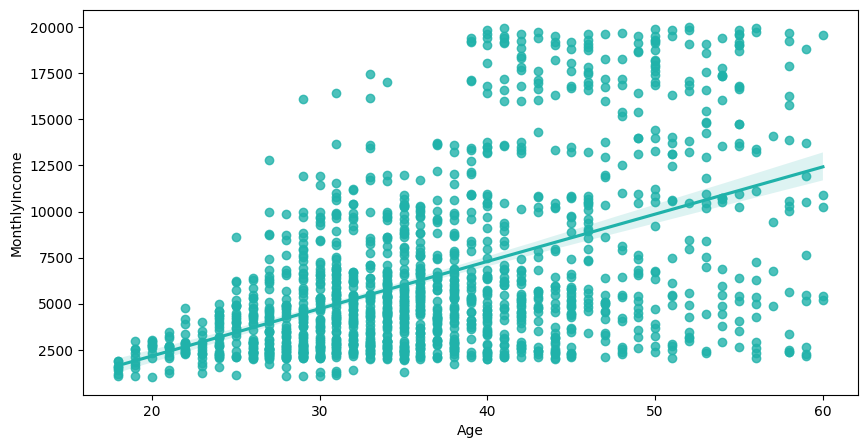

In [ ]:
# Plotting Age vs monthly income
plt.figure(figsize = (10,5))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = df,color='lightseagreen')
plt.show()

**There is a linear relation between Age and Monthly income**

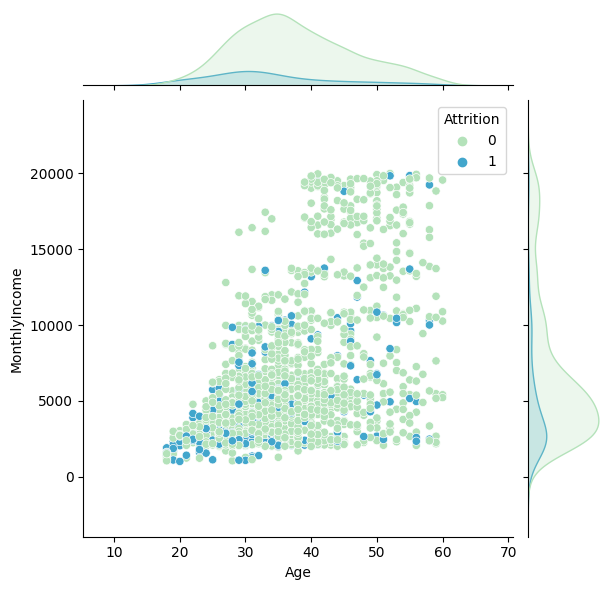

In [ ]:
sns.jointplot(x='Age', y='MonthlyIncome', data=df, hue='Attrition', palette=c2)
plt.show()

In [ ]:
df.groupby(['Attrition'])['Age'].mean().to_frame()

,Age
Attrition,
0,37.561233
1,33.607595


In [ ]:
df.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Attrition,
0,6832.739659
1,4787.092827


**Key finding:**
- Employees with lower income and younger age exhibit higher attrition rates.

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

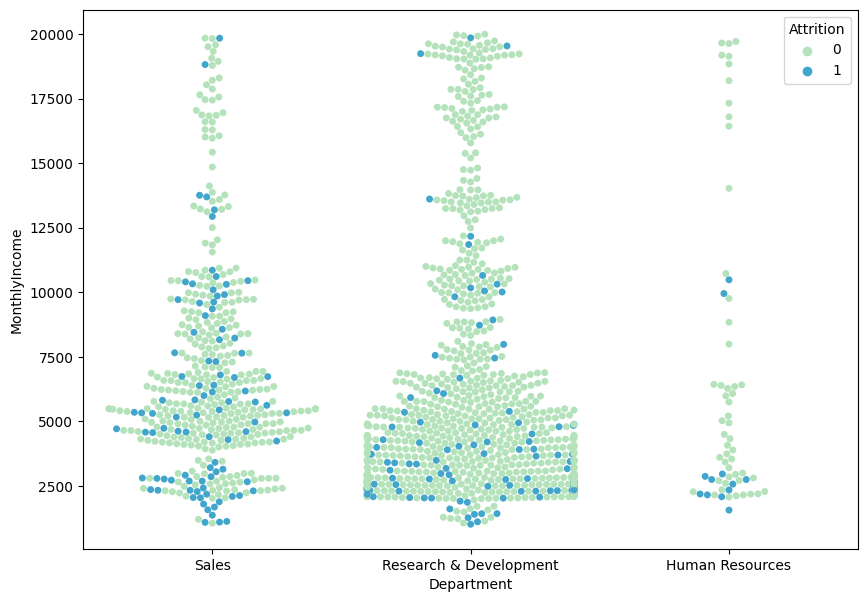

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot( x="Department", y='MonthlyIncome', data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('Department')['Attrition'].mean().to_frame()

,Attrition
Department,
Human Resources,0.190476
Research & Development,0.138398
Sales,0.206278


In [ ]:
df.groupby(['Department','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Department             Attrition               
Human Resources        0            7345.980392
                       1            3715.750000
Research & Development 0            6630.326087
                       1            4108.075188
Sales                  0            7232.240113
                       1            5908.456522

**Key finding:**
- Both attrition rate and MonthlyIncome are notably high in the Sales Department.

<Axes: xlabel='Department', ylabel='DistanceFromHome'>

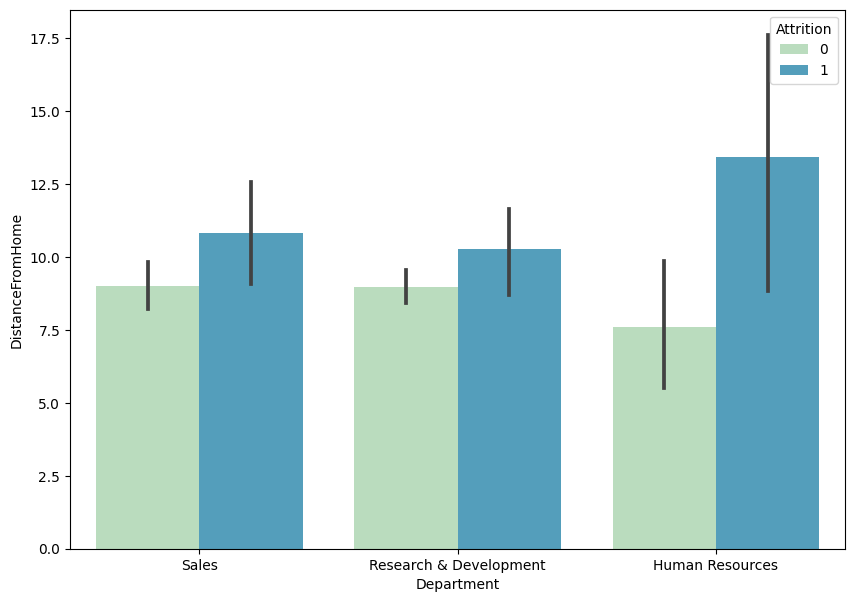

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Department', y='DistanceFromHome', data=df, hue='Attrition', palette=c2)

**Key finding:**
- Employees residing far from the company are more likely to leave.

<Axes: xlabel='Education', ylabel='HourlyRate'>

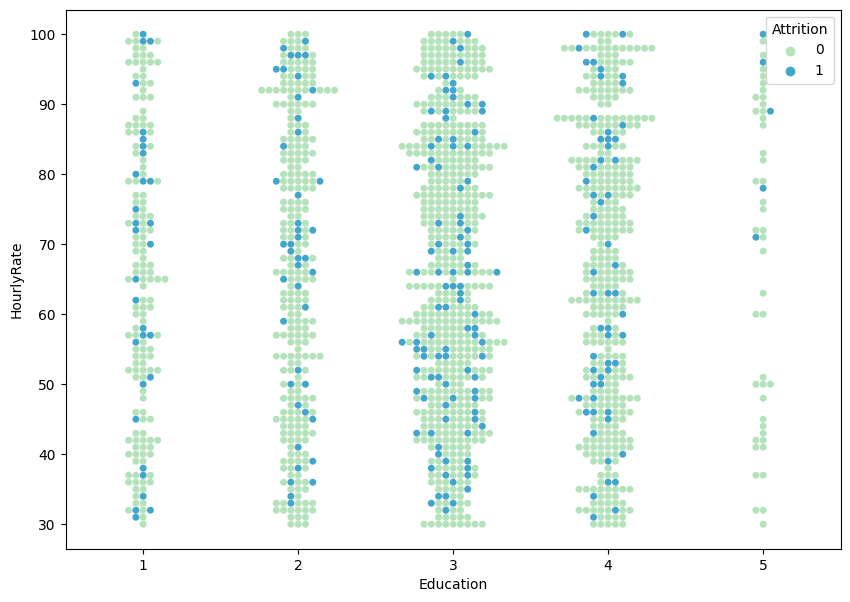

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot( x="Education", y='HourlyRate', data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('Education')['Attrition'].mean().to_frame()

,Attrition
Education,
1,0.182353
2,0.156028
3,0.173077
4,0.145729
5,0.104167


In [ ]:
df.groupby(['Education','Attrition'])['HourlyRate'].mean().to_frame()

HourlyRate
Education Attrition            
1         0           64.899281
          1           65.645161
2         0           65.819328
          1           68.409091
3         0           66.213531
          1           62.919192
4         0           66.067647
          1           66.086207
5         0           66.302326
          1           86.800000

**Key finding:**
- Employees at education level 5 demonstrate a lower likelihood of leaving, often departing despite a higher HourlyRate.

<Axes: xlabel='EducationField', ylabel='DailyRate'>

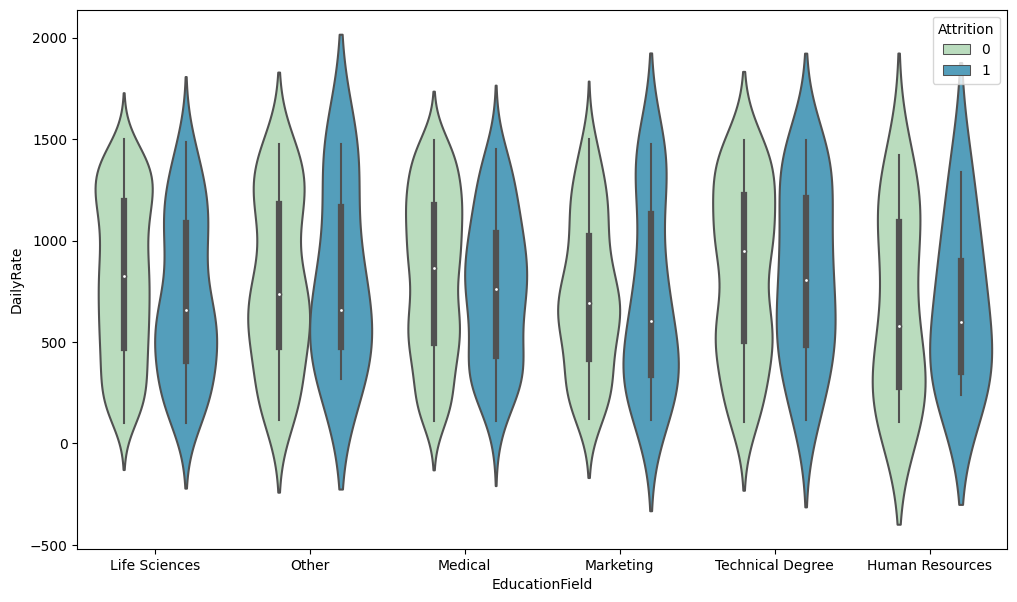

In [ ]:
plt.figure(figsize=(12,7))
sns.violinplot(x="EducationField", y='DailyRate', data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('EducationField')['Attrition'].mean().to_frame()

,Attrition
EducationField,
Human Resources,0.259259
Life Sciences,0.146865
Marketing,0.220126
Medical,0.135776
Other,0.134146
Technical Degree,0.242424


In [ ]:
df.groupby(['EducationField','Attrition'])['DailyRate'].mean().to_frame()

DailyRate
EducationField   Attrition            
Human Resources  0          677.550000
                 1          668.714286
Life Sciences    0          818.789168
                 1          720.988764
Marketing        0          731.064516
                 1          716.400000
Medical          0          832.002494
                 1          764.222222
Other            0          792.647887
                 1          817.818182
Technical Degree 0          843.900000
                 1          836.593750


**Key Finding:**
- Employees in the Human Resource and Technical Degree EducationField exhibit a high likelihood of leaving the company. Moreover, those with a Technical Degree background tend to leave, especially with a high DailyRate.

<Axes: xlabel='JobLevel', ylabel='YearsAtCompany'>

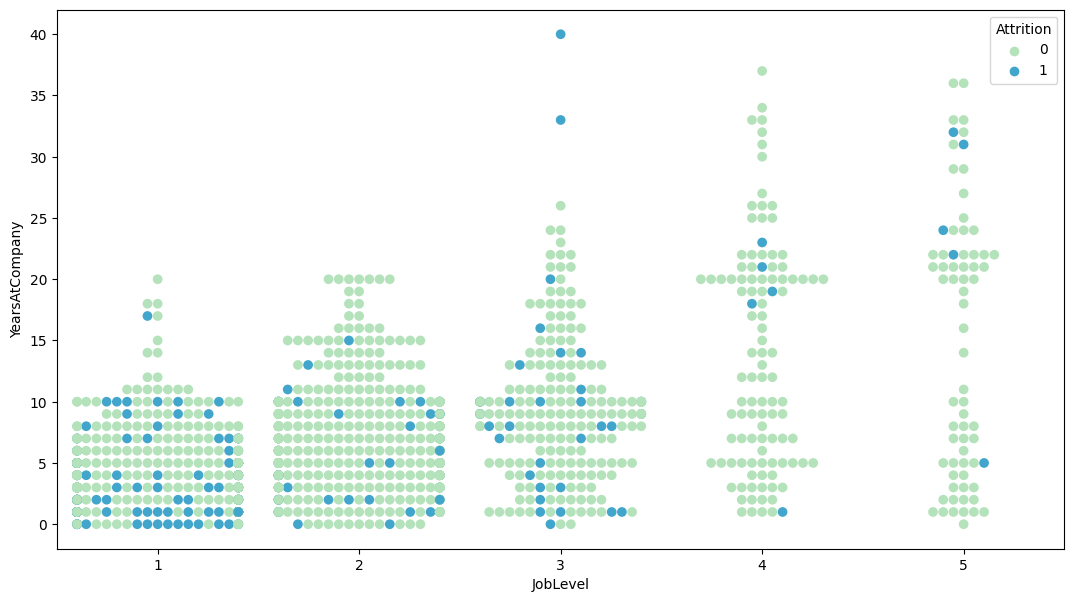

In [ ]:
plt.figure(figsize=(13,7))
sns.swarmplot( x="JobLevel", y='YearsAtCompany', data=df, hue='Attrition', size=7, palette=c2)

In [ ]:
df.groupby('JobLevel')['Attrition'].mean().to_frame()

,Attrition
JobLevel,
1,0.263352
2,0.097378
3,0.146789
4,0.047170
5,0.072464


In [ ]:
df.groupby(['JobLevel','Attrition'])['YearsAtCompany'].median().to_frame()

YearsAtCompany
JobLevel Attrition                
1        0                     4.0
         1                     2.0
2        0                     6.0
         1                     5.0
3        0                     9.0
         1                     8.5
4        0                    12.0
         1                    19.0
5        0                    15.0
         1                    24.0

**Key Finding:**

- Employees at a two-year tenure and JobLevel 1 display a higher likelihood of leaving the company.

<Axes: xlabel='BusinessTravel', ylabel='MonthlyIncome'>

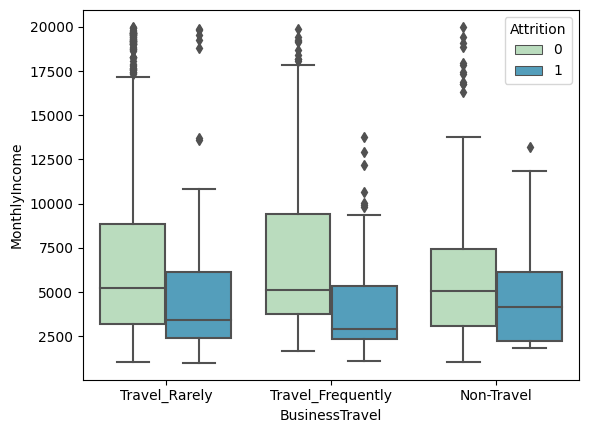

In [ ]:
sns.boxplot(x='BusinessTravel', y='MonthlyIncome', data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('BusinessTravel')['Attrition'].mean().to_frame()

,Attrition
BusinessTravel,
Non-Travel,0.080000
Travel_Frequently,0.249097
Travel_Rarely,0.149569


In [ ]:
df.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
BusinessTravel    Attrition               
Non-Travel        0                 5086.0
                  1                 4176.5
Travel_Frequently 0                 5112.0
                  1                 2909.0
Travel_Rarely     0                 5228.0
                  1                 3407.5

**Key Finding:**

- Employees with low MonthlyIncome who frequently travel have a higher likelihood of leaving the company.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

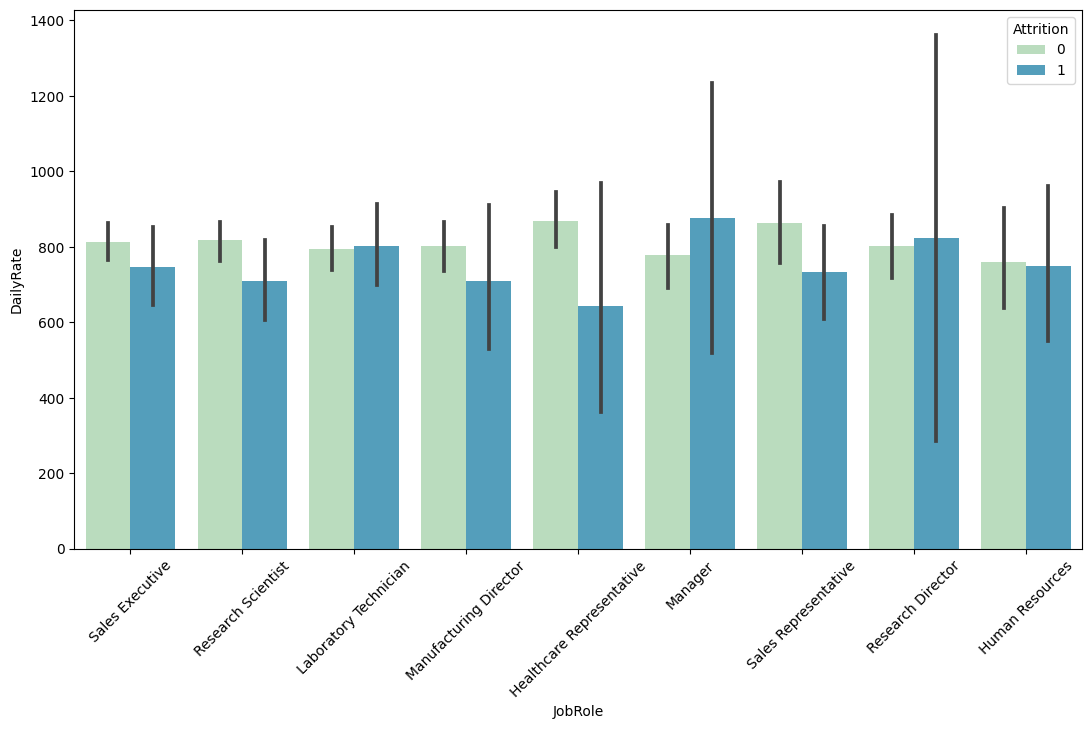

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(x='JobRole', y='DailyRate', data=df, hue='Attrition', palette=c2)
plt.xticks(rotation=45)

**Key finding:**
- In every JobRole, departing employees tend to have lower DailyRate compared to those who remain in the company, except Managers and Research Directors.

<Axes: xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

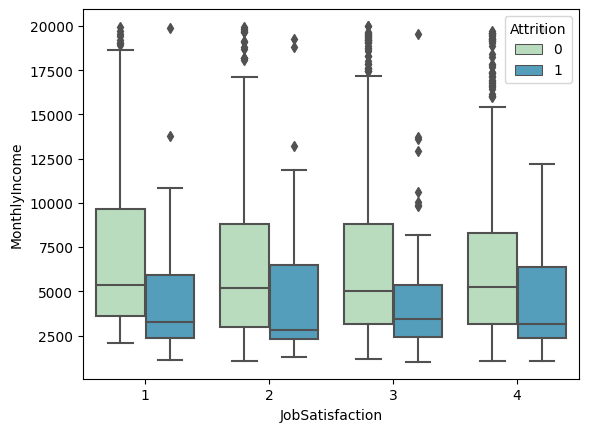

In [ ]:
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=df, hue='Attrition', palette=c2)

In [ ]:
df.groupby('JobSatisfaction')['Attrition'].mean().to_frame()

,Attrition
JobSatisfaction,
1,0.228374
2,0.164286
3,0.165158
4,0.113290


In [ ]:
df.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
JobSatisfaction Attrition               
1               0            7096.901345
                1            4752.803030
2               0            6834.893162
                1            4962.760870
3               0            6853.311653
                1            4595.986301
4               0            6668.113022
                1            4943.500000

**Key finding:**
- Employees with low MonthlyIncome and JobSatisfaction level 1 are more likely to leave the company.

<Axes: xlabel='MaritalStatus', ylabel='Age'>

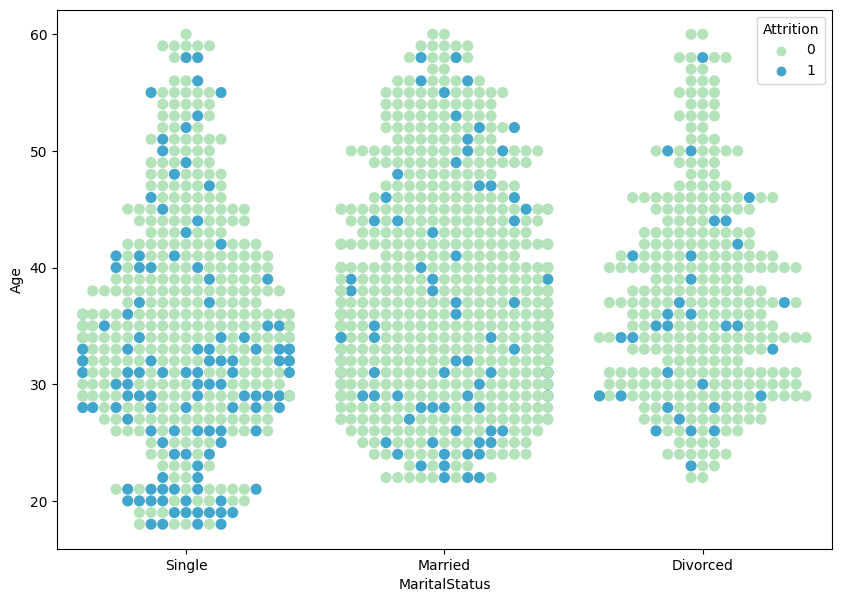

In [ ]:
plt.subplots(figsize=(10,7))
sns.swarmplot(x='MaritalStatus', y='Age', data=df, hue='Attrition', size=8, palette=c2)

In [ ]:
df.groupby('MaritalStatus')['Attrition'].mean().to_frame()

,Attrition
MaritalStatus,
Divorced,0.100917
Married,0.124814
Single,0.255319


In [ ]:
df.groupby(['MaritalStatus','Attrition'])['Age'].mean().to_frame()

Age
MaritalStatus Attrition           
Divorced      0          37.704082
              1          35.575758
Married       0          38.076401
              1          35.523810
Single        0          36.574286
              1          31.725000

<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

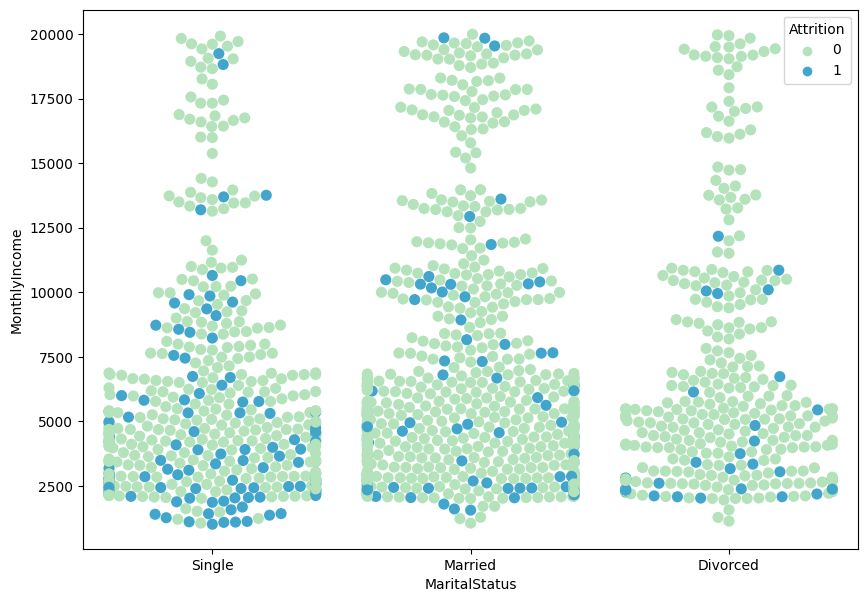

In [ ]:
plt.subplots(figsize=(10,7))
sns.swarmplot(x='MaritalStatus', y='MonthlyIncome', data=df, hue='Attrition', size=8, palette=c2)

In [ ]:
df.groupby(['MaritalStatus','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
MaritalStatus Attrition               
Divorced      0            7071.455782
              1            4245.696970
Married       0            6969.779287
              1            5558.821429
Single        0            6401.600000
              1            4395.766667

**Key finding:**
- Single, young employees with low MonthlyIncome exhibit a higher likelihood of leaving the company.

#Data Processing

In [ ]:
# defining target and indipendent features
y=df[['Attrition']]
X=df.drop('Attrition', axis=1)

In [ ]:
# removing feature with zero variance
def unique_level(i):
    i = i.value_counts().count()
    return i
feature_val_count= pd.DataFrame(X.apply(lambda i: unique_level(i)))

In [ ]:
feature_val_count

,0
Age,43
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EnvironmentSatisfaction,4
Gender,2


In [ ]:
# saperate numerical and categorical features
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [ ]:
feature_level_val = pd.DataFrame(num.nunique())
feature_level_val.columns = ['unique_level']

In [ ]:
feature_level_val

,unique_level
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4


In [ ]:
# Saperating all catagorical column with numical data
cat_feat = feature_level_val[feature_level_val['unique_level']<=20]
cat_fet_index = cat_feat.index
cat_column = num.loc[:, cat_fet_index]
cat_column.columns

Index(['Education', 'EmployeeCount', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# saperating all numerical column after separating
num_feat = feature_level_val[feature_level_val['unique_level']>20]
num_fet_index = num_feat.index
numerical = num.loc[:, num_fet_index]
numerical.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

In [ ]:
# joining all catagorical column after separating
catagorical = pd.concat([char, cat_column], axis=1, join='inner')

In [ ]:
#outlier analysis
numerical.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


In [ ]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [ ]:
numerical=numerical.apply(lambda x : outlier_cap(x))

In [ ]:
numerical.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


<Axes: >

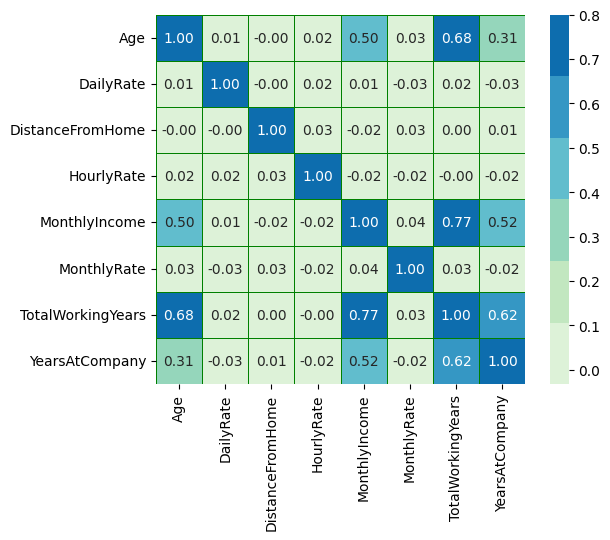

In [ ]:
# Checking corelation between numerical featutes
cmap =sns.color_palette("GnBu",n_colors=6)
cor =numerical.corr()
sns.heatmap(cor, annot=True, vmax=0.8, cmap=cmap, fmt='.2f', linecolor='green', linewidths=0.7, square=True)

In [ ]:
#  function for removing corelated feature
def correlMatrix(data,thres):
    correlated_features = set()
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > thres:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

In [ ]:
#  show corelated column if corelation more than 0.75
correlated_feat = correlMatrix(numerical, 0.75)
correlated_feat

{'TotalWorkingYears'}

In [ ]:
# drop corelated features
numerical.drop(correlated_feat, axis=1, inplace=True)

In [ ]:
# Dropping Gender and PerformanceRating categorical feature
catagorical.drop(columns=['Gender', 'PerformanceRating'], axis=1, inplace=True)

In [ ]:
# converting to catagorical data types
catagorical = catagorical.astype(object)

In [ ]:
catagorical.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,EnvironmentSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y,Yes,2,1,2,...,8,11,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,No,1,1,3,...,1,23,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y,Yes,2,1,4,...,6,15,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,Yes,4,1,4,...,1,11,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y,No,1,1,1,...,9,12,4,80,1,3,3,2,2,2


In [ ]:
# Create dummy features with n-1 levels for all catagorical column
catag_dum = pd.get_dummies(catagorical, drop_first = True)
catag_dum.shape

(1470, 125)

#Model Building

In [ ]:
# importing libraries for feature selection and models
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# K Best for Selecting Categorical Features using k=20
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(catag_dum, y)

cols = selector.get_support(indices=True)
X_ca= catag_dum.iloc[:, cols]

In [ ]:
# joining all inpendent features
X_all=pd.concat([numerical, X_ca], axis=1, join='inner')

In [ ]:
# independent feature shape
X_all.shape

(1470, 27)

In [ ]:
# balancing the dataset
from imblearn.over_sampling import  RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)
X_s,Y_s = ros.fit_resample(X_all, y)

In [ ]:
# spliting dataset
X_train, x_test, y_train, y_test=train_test_split(X_s.values, Y_s.values, test_size=0.2, random_state=1)

In [ ]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", x_test.shape)
print("Attrition Rate in Training Data", y_train.mean())
print("Attrition Rate in Testing Data", y_test.mean())

Shape of Training Data (1972, 27)
Shape of Testing Data (494, 27)
Attrition Rate in Training Data 0.4949290060851927
Attrition Rate in Testing Data 0.520242914979757


In [ ]:
# tranformion by standard scaler
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

In [ ]:
#  function for training and evaluate model
def modelEval(xtr,ytr,xte,yte,model):
    model.fit(xtr,ytr)

    # Prediction for Test and Train Dataset
    test_pred=model.predict(xte)
    train_pred =model.predict(xtr)

    tpr_score = metrics.precision_score(ytr, train_pred)
    trc_score = metrics.recall_score(ytr, train_pred)
    tac_score =metrics.accuracy_score(ytr, train_pred)
    print("For Training Dataset.")
    print(f'Accuracy: {tac_score:.2f}, Precision: {tpr_score:.2f}, Recall: {trc_score:.2f}')
    print("===============================")
    pr_score = metrics.precision_score(yte, test_pred)
    rc_score = metrics.recall_score(yte, test_pred)
    ac_score = metrics.accuracy_score(yte, test_pred)
    print("===============================")
    print("===============================")
    print("For Testing Dataset")
    print("===============================")
    print("F1:",metrics.f1_score(yte, test_pred))
    print(f'Accuracy: {ac_score:.2f}, Precision: {pr_score:.2f}, Recall: {rc_score:.2f}')
    print("===============================")
    print(classification_report(yte,test_pred))

    cm = confusion_matrix(yte, test_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='GnBu')
    plt.show()

##Decision Tree

Model Name : Decision Tree
For Training Dataset.
Accuracy: 0.97, Precision: 0.95, Recall: 0.99
For Testing Dataset
F1: 0.9080675422138836
Accuracy: 0.90, Precision: 0.88, Recall: 0.94
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       237
           1       0.88      0.94      0.91       257

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



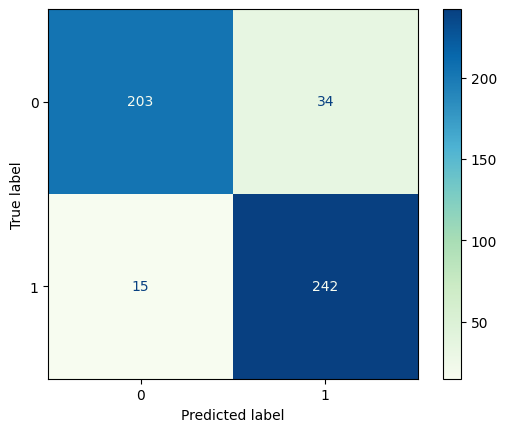

In [ ]:
model_dt = DecisionTreeClassifier(random_state=11, max_depth=10, criterion = "gini")
print("Model Name : Decision Tree")
modelEval(X_train, y_train, x_test, y_test, model_dt)

###Hyper-Parameter Optimization using GridSearchCV for Decision Tree Model

In [ ]:
# Set the random state for reproducibility
dt_model2 = DecisionTreeClassifier(random_state=3)

In [ ]:
# selcting best parameter using GridSearchCV
start = time.time()

param_dist = {'max_depth': [7,8,9],
              'min_samples_split':[9,11,15],
              'min_samples_leaf':[9,11,13],
              'criterion': ['gini']}

cv_rf = GridSearchCV(estimator=dt_model2, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 9}
Time taken in grid search:  3.62


In [ ]:
# initializing best parameter using grid search
criti = cv_rf.best_params_['criterion']
sample_split=cv_rf.best_params_['min_samples_split']
sample_leaf = cv_rf.best_params_['min_samples_leaf']
depth = cv_rf.best_params_['max_depth']

Model Name : Decision Tree with Hyper parameter :
For Training Dataset.
Accuracy: 0.88, Precision: 0.87, Recall: 0.90
For Testing Dataset
F1: 0.8333333333333334
Accuracy: 0.83, Precision: 0.83, Recall: 0.84
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       237
           1       0.83      0.84      0.83       257

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494



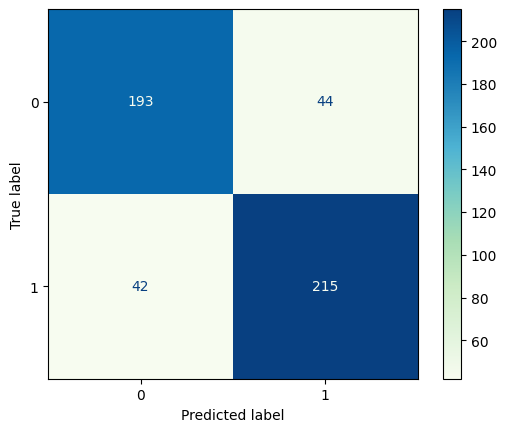

In [ ]:
#  model with best parameter
dt_model2.set_params(criterion = criti,
                     max_depth=depth,
                     min_samples_leaf=sample_leaf,
                     min_samples_split=sample_split)

print("Model Name : Decision Tree with Hyper parameter :")
modelEval(X_train, y_train, x_test, y_test, dt_model2)

##K-Nearest Neighbours Classifier model

In [ ]:
# Detection of Optimal Value for K Neighnours
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

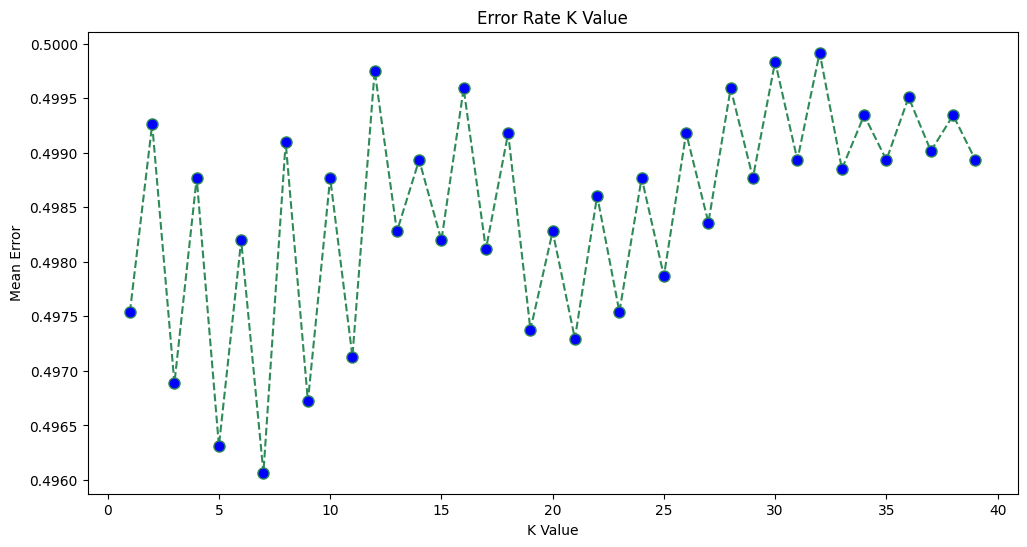

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='seagreen', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

Model Name : KNeighborsClassifier:
For Training Dataset.
Accuracy: 0.88, Precision: 0.81, Recall: 0.97
For Testing Dataset
F1: 0.8342440801457196
Accuracy: 0.82, Precision: 0.78, Recall: 0.89
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       237
           1       0.78      0.89      0.83       257

    accuracy                           0.82       494
   macro avg       0.82      0.81      0.81       494
weighted avg       0.82      0.82      0.81       494



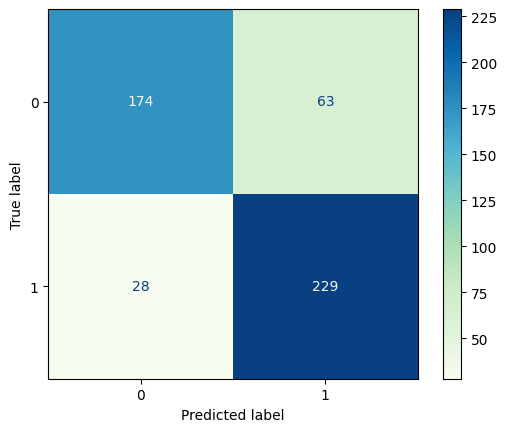

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
print("Model Name : KNeighborsClassifier:")
modelEval(X_train, y_train, x_test, y_test, classifier)

## Random Forest Classifier

Model Name : Random Forest
For Training Dataset.
Accuracy: 0.89, Precision: 0.90, Recall: 0.87
For Testing Dataset
F1: 0.847870182555781
Accuracy: 0.85, Precision: 0.89, Recall: 0.81
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       237
           1       0.89      0.81      0.85       257

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



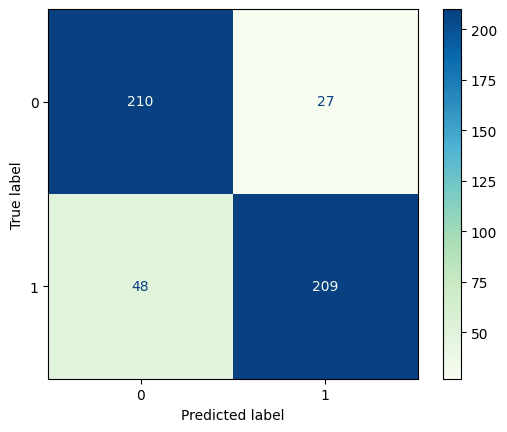

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=6)
print("Model Name : Random Forest")
modelEval(X_train, y_train, x_test, y_test, rf)

###Hyper-Parameter Optimization using GridSearchCV for Random Forest Classifier

In [ ]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=1)

In [ ]:
start = time.time()

param_dist = {'max_depth': [7,8,9],
              'max_features': ['auto'],
              'criterion': ['gini','entropy'],
              'min_samples_split':[8,9,11,12],
              'min_samples_leaf':[8,9,11,13]}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train.ravel())
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 8}
Time taken in grid search:  268.02


In [ ]:
# initializing best parameter using grid search
criti = cv_rf.best_params_['criterion']
sample_split=cv_rf.best_params_['min_samples_split']
sample_leaf = cv_rf.best_params_['min_samples_leaf']
depth = cv_rf.best_params_['max_depth']

In [ ]:
# Set best parameters given by grid search
fit_rf.set_params(n_estimators=200,bootstrap=True,criterion = criti,
                  max_features = 'auto',
                  max_depth = depth,
                  min_samples_leaf=sample_leaf,
                  min_samples_split=sample_split)

RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=9,
                       min_samples_split=8, n_estimators=200, random_state=1)

Model Name : Random Forest hyper parameter optimization
For Training Dataset.
Accuracy: 0.92, Precision: 0.93, Recall: 0.91
For Testing Dataset
F1: 0.8537074148296593
Accuracy: 0.85, Precision: 0.88, Recall: 0.83
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       237
           1       0.88      0.83      0.85       257

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



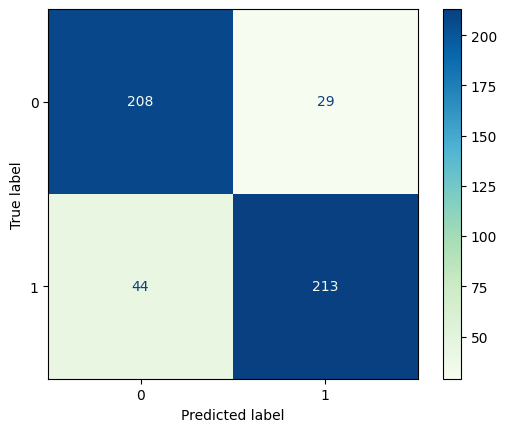

In [ ]:
print("Model Name : Random Forest hyper parameter optimization")
modelEval(X_train, y_train, x_test, y_test, fit_rf)

##SVC Model

Model Name : SVC
For Training Dataset.
Accuracy: 0.89, Precision: 0.87, Recall: 0.92
For Testing Dataset
F1: 0.8659003831417624
Accuracy: 0.86, Precision: 0.85, Recall: 0.88
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       237
           1       0.85      0.88      0.87       257

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



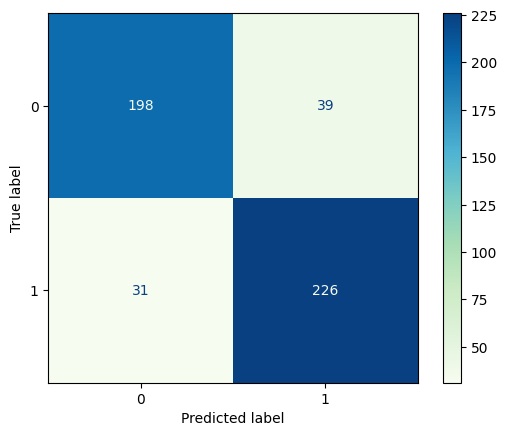

SVC()

In [ ]:
svc_model = SVC(kernel='rbf', gamma='scale')
print("Model Name : SVC")
modelEval(X_train, y_train, x_test, y_test, svc_model)
svc_model.fit(X_train, y_train.ravel())